<Axes: xlabel='label', ylabel='intercalation_energy'>

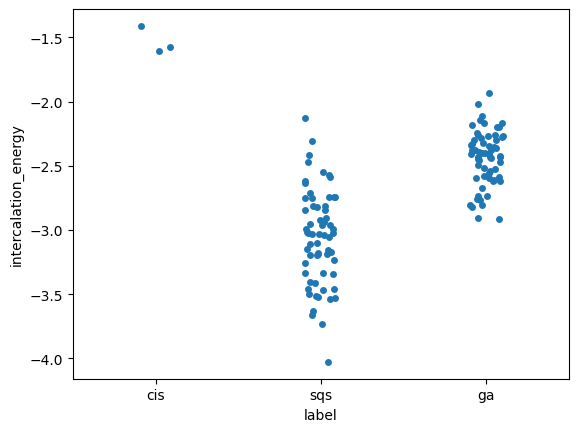

In [32]:
import pandas as pd
import seaborn as sns

from vasppy.calculation import *


def get_dict_entries(keys, full_dict):
    """
    Return entry in a dictionary with a given key.
    """
    return [full_dict[key] for key in keys][0]


def calculate_intercalation_energy(entry, li_energy, ref):
    """
    Calculate intercalation energy using the given entry and Li energy.
    """
    return entry.energy - ref - li_energy * entry.stoichiometry["Li"]


def get_reference_energy(calc_dict):
    """
    Get reference energy from the host structure in the set of all calculations.
    """
    entry = [entry for entry in calc_dict.values() if "Li" not in entry.stoichiometry.keys()][0]
    return entry.energy


# Load data
Li_dict = import_calculations_from_file("elemental_Li_vasp_summary.yaml")
ga_dict = import_calculations_from_file("vasp_summary_GA.yaml", skip_incomplete_records=True)
cis_dict = import_calculations_from_file("vasp_summary_cis.yaml")
sqs_dict = import_calculations_from_file("vasp_summary_sqs.yaml")

elemental_Li = get_dict_entries(["elemental Li opt"], Li_dict)
Li_energy = elemental_Li.energy / elemental_Li.stoichiometry["Li"]

# Calculate reference energies
cis_reference_energy = get_reference_energy(cis_dict)
sqs_reference_energy = get_reference_energy(sqs_dict)
ga_reference_energy = get_reference_energy(ga_dict)

# Calculate and print intercalation energies
records = []
for calc_dict, ref, label in zip([cis_dict, sqs_dict, ga_dict], [cis_reference_energy, sqs_reference_energy, ga_reference_energy], ["cis", "sqs", "ga"]):
    for key, entry in calc_dict.items():
        if entry.stoichiometry["Li"] == 0:
            continue
        intercalation_energy = calculate_intercalation_energy(entry, Li_energy, ref)
        row = dict(row=key, intercalation_energy=intercalation_energy, label=label)
        records.append(row)

df = pd.DataFrame.from_records(records)
sns.stripplot(data=df, x="label", y="intercalation_energy")